In [110]:
from pandas import *
from pandas.io.json import json_normalize
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
raw_data = json.load(open('benchmark.json'))['benchmarks']
libs = ['direct', 'capnp', 'rpclib', 'thrift']
frames = {}
for lib in libs:
    key = '{}_bench/get_blob'.format(lib)
    data = [b for b in raw_data if ('mean' in b['name'] and key in b['name'])]
    for i, b in enumerate(data):
        b['name'] = b['name'].split('/')[2].split('_')[0]
        b['cpu_time'] = b['cpu_time'] / 1000000
        b['real_time'] = b['real_time'] / 1000000
        b['time_unit'] = 'ms'
    p_data = json_normalize(data)
    frames[lib] = p_data

In [112]:
%matplotlib inline
all = pd.concat(frames)
del all['iterations']
del all['time_unit']
plt.figure(figsize=(16, 8))
all.reset_index(level=0, inplace=True)
all.rename(columns={'level_0': 'library'}, inplace=True)

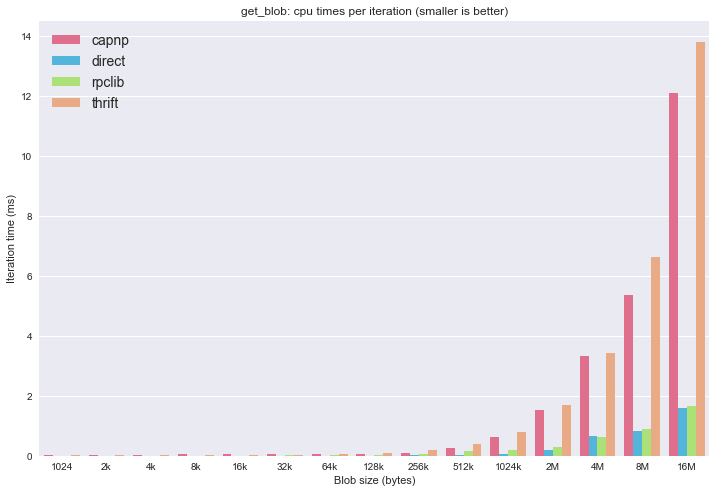

In [113]:
plt.figure(figsize=(12, 8))
colors = ['#F25C84', '#3DBFF2', '#ACF266', '#F9A575', '#AB58FC']
sns.set_palette(colors)
g = sns.barplot(x='name', y='cpu_time', data=all, hue="library")
g.legend(loc=2,prop={'size':14})
sns.plt.title('get_blob: cpu times per iteration (smaller is better)')
g.set(xlabel='Blob size (bytes)', ylabel='Iteration time (ms)')
g.get_figure().savefig('get_blob_cpu_linear.svg')

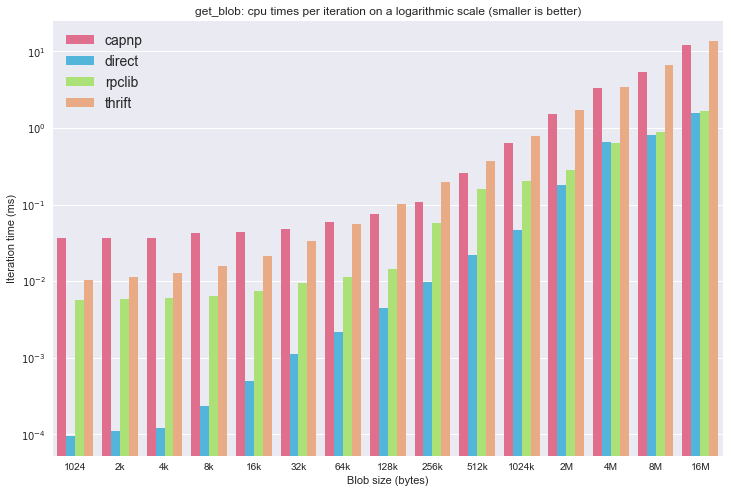

In [114]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='name', y='cpu_time', data=all, hue="library")
g.set_yscale('log')
g.legend(loc=2,prop={'size':14})
sns.plt.title('get_blob: cpu times per iteration on a logarithmic scale (smaller is better)')
g.set(xlabel='Blob size (bytes)', ylabel='Iteration time (ms)')
g.get_figure().savefig('get_blob_cpu_log.svg')

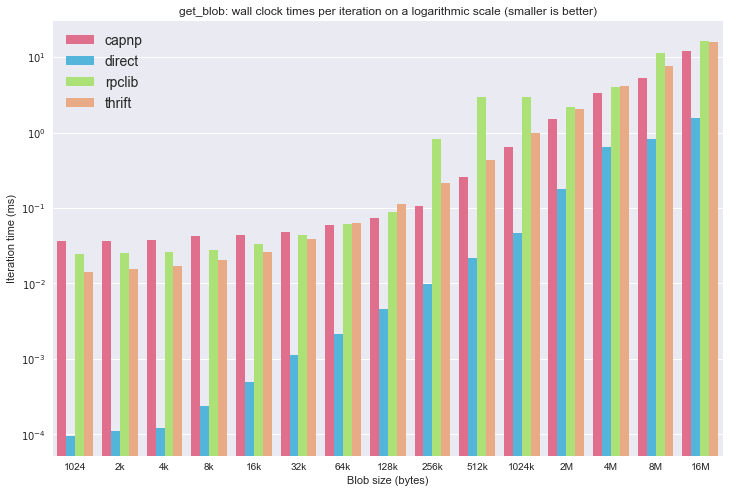

In [115]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='name', y='real_time', data=all, hue="library")
g.set_yscale('log')
g.legend(loc=2,prop={'size':14})
sns.plt.title('get_blob: wall clock times per iteration on a logarithmic scale (smaller is better)')
g.set(xlabel='Blob size (bytes)', ylabel='Iteration time (ms)')
g.get_figure().savefig('get_blob_real_log.svg')

In [116]:
libs = ['direct', 'capnp', 'rpclib', 'thrift', 'grpc']
get_answer_data = {}
frames = {}
for lib in libs:
    for b in raw_data:
        if b['name'] == '{}_bench/get_answer_mean'.format(lib):
            b['cpu_time'] = b['cpu_time'] / 1000000
            b['real_time'] = b['real_time'] / 1000000
            b['time_unit'] = 'ms'
            get_answer_data[lib] = b
    p_data = json_normalize(get_answer_data[lib])
    frames[lib] = p_data
all = pd.concat(frames)
all.reset_index(level=0, inplace=True)
all.rename(columns={'level_0': 'library'}, inplace=True)

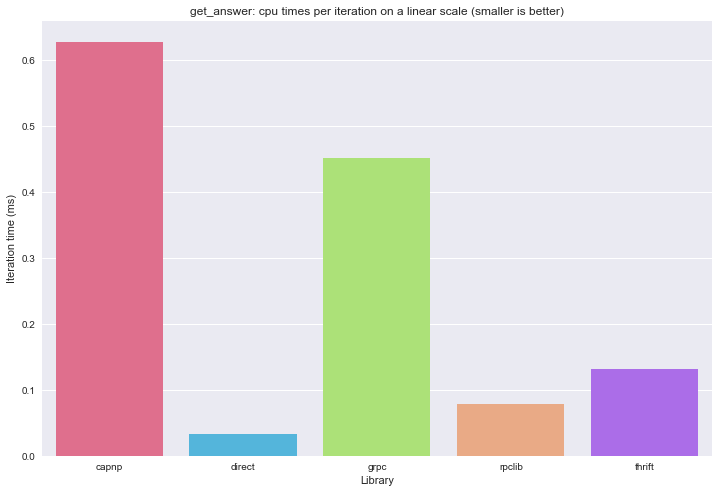

In [117]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='library', y='cpu_time', data=all)#, hue="library")
sns.plt.title('get_answer: cpu times per iteration on a linear scale (smaller is better)')
g.set(xlabel='Library', ylabel='Iteration time (ms)')
g.get_figure().savefig('get_answer_cpu_linear.svg')

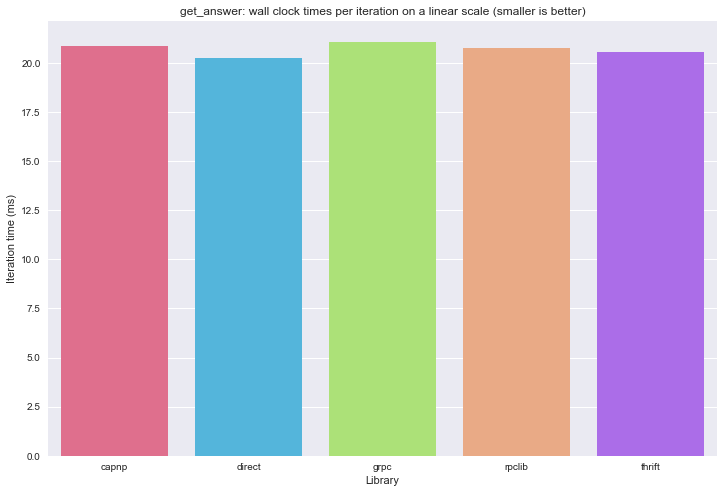

In [118]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='library', y='real_time', data=all)#, hue="library")
sns.plt.title('get_answer: wall clock times per iteration on a linear scale (smaller is better)')
g.set(xlabel='Library', ylabel='Iteration time (ms)')
g.get_figure().savefig('get_answer_real_linear.svg')

In [119]:
libs = ['direct', 'capnp', 'rpclib', 'thrift', 'grpc']
get_answer_data = {}
frames = {}
for lib in libs:
    for b in raw_data:
        if b['name'] == '{}_bench/get_structs_mean'.format(lib):
            b['cpu_time'] = b['cpu_time'] / 1000000
            b['real_time'] = b['real_time'] / 1000000
            b['time_unit'] = 'ms'
            get_answer_data[lib] = b
    p_data = json_normalize(get_answer_data[lib])
    frames[lib] = p_data
all = pd.concat(frames)
all.reset_index(level=0, inplace=True)
all.rename(columns={'level_0': 'library'}, inplace=True)

,library,cpu_time,iterations,name,real_time,time_unit
0,capnp,0.180929,23147,capnp_bench/get_structs_mean,0.180937,ms
0,direct,3.894397,1065,direct_bench/get_structs_mean,3.894544,ms
0,grpc,11.261431,374,grpc_bench/get_structs_mean,17.650660,ms
0,rpclib,4.751389,977,rpclib_bench/get_structs_mean,8.341386,ms
0,thrift,8.988329,400,thrift_bench/get_structs_mean,12.296442,ms


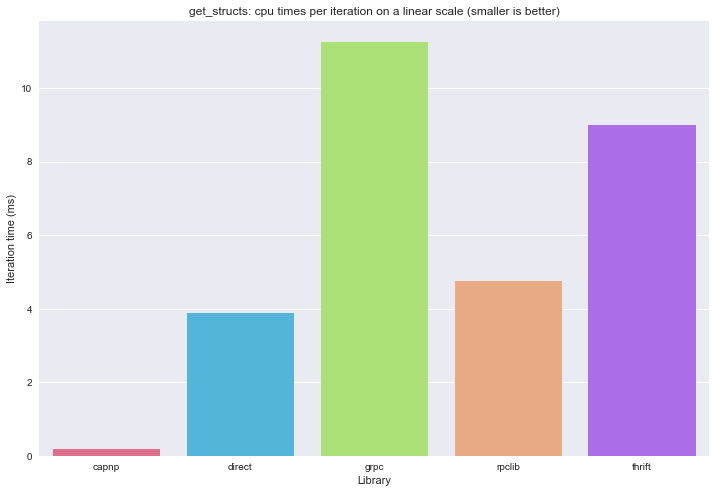

In [123]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='library', y='cpu_time', data=all)#, hue="library")
sns.plt.title('get_structs: cpu times per iteration on a linear scale (smaller is better)')
g.set(xlabel='Library', ylabel='Iteration time (ms)')
g.get_figure().savefig('get_structs_cpu_linear.svg')

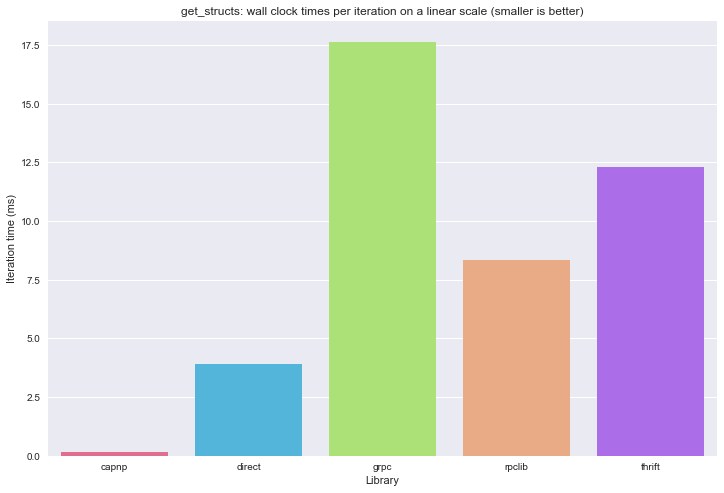

In [124]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='library', y='real_time', data=all)#, hue="library")
sns.plt.title('get_structs: wall clock times per iteration on a linear scale (smaller is better)')
g.set(xlabel='Library', ylabel='Iteration time (ms)')
g.get_figure().savefig('get_structs_real_linear.svg')